In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download the images in ./data/images folder

In [36]:
import urllib.request
from pathlib import Path
import zipfile
tmp_filename = "archive.zip"
Path("./data").mkdir(exist_ok=True)
urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1R-8ieidrUVuqNHgD-Hyw_od5pHbjgbOO&confirm=t&uuid=25b26a1a-8ed1-4eb1-a2a4-343d0e48a3ee&at=ALgDtswyiievmv0tddNky9ePQCt9:1676728294393", tmp_filename);
with zipfile.ZipFile(tmp_filename, 'r') as zip_ref:
    zip_ref.extractall("./data")
Path(tmp_filename).unlink()

In [37]:
n = len(tuple(Path("data/images/").glob("*.jpg")))
print(f"{n} images in data/images folder")

63565 images in data/images folder


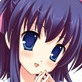

In [38]:
from IPython.display import Image
Image(filename=next(Path("data/images/").glob("*.jpg")))

## Parameters

In [39]:
# Root directory for dataset
dataroot = "./data"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 50 # Original is 5 on a dataset of 1 million

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

## Preview

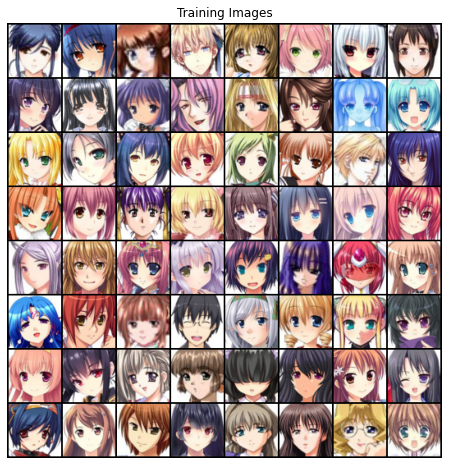

In [41]:
dataset = torchvision.datasets.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))